# Podatki o študentskih delih

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

%matplotlib inline

DELA = pd.read_csv("studentska_dela.csv", index_col="delo")

Tabela, ki prikazuje 2000 oglasov

In [2]:
DELA

,plača neto,kraj,delovnik,trajanje
delo,,,,
DEKLARIRANJE,7.06 €/h neto,ŠENTJUR,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
INŠTALACIJE,8.00 €/h neto,ŠTAJERSKA REGIJA,DOPOLDAN,PO DOGOVORU
MARKETING,9.00 €/h neto,LJUBLJANA,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
ADMINISTRATIVNA DELA,7.31 €/h neto,LJUBLJANA,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
KONTROLA KAKOVOSTI,6.45 €/h neto,ŠKOFJA LOKA,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
...,...,...,...,...
KOMERCIALNA DELA,9.00 €/h neto,TRZIN,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
ZDRAVSTVENA NEGA,8.00 €/h neto,LJUBLJANA,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)
PRODAJA,7.00 €/h neto,LJUBLJANA RUDNIK IN /ALI VIČ,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)


Podtabela, kjer so dela razporejena od najbolj do najmanj plačanih. 
Dela, kjer plača ni določena so izpuščena.

In [3]:
podtabela = DELA.copy()
podtabela["plača neto"] = podtabela["plača neto"].str.extract(r'(\d+\.\d+)').astype(float)
podtabela = podtabela.sort_values("plača neto", ascending=False).dropna(subset=["plača neto"])
podtabela["plača neto"] = podtabela["plača neto"].astype(str) + " €/h neto"
podtabela

,plača neto,kraj,delovnik,trajanje
delo,,,,
TRENER/KA,20.0 €/h neto,LJUBLJANA,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
POUČEVANJE,20.0 €/h neto,KAMNIK,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
VADITELJ/ICA,20.0 €/h neto,VELENJE,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
TRENER/KA,20.0 €/h neto,LJUBLJANA,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
POUČEVANJE,16.52 €/h neto,BLED IN RADOVLJICA,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
...,...,...,...,...
PRODAJA,6.2 €/h neto,MURSKA SOBOTA,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
PRODAJA,6.2 €/h neto,CELJE,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)
KLICNI CENTER,6.2 €/h neto,LJUBLJANA - NOVE JARŠE,DOPOLDAN,POČITNIŠKO DELO


Funkcija, ki vrne slovar, kjer vrednosti predstavljajo število možnih del, glede na delovnik

In [4]:
def šteje_dela_po_delovniku(DELA):
    preštevanje = {
        'Dopoldan': int(DELA['delovnik'].str.contains('DOPOLDAN').sum()),
        'Popoldan': int(DELA['delovnik'].str.contains('POPOLDAN').sum()),
        'Po dogovoru': int(DELA['delovnik'].str.contains('PO DOGOVORU').sum()),
        'Izmensko': int(DELA['delovnik'].str.contains('IZMENSKO').sum())
    }
    preštevanje['Ostalo'] = int(DELA[~DELA['delovnik'].str.contains('DOPOLDAN|POPOLDAN|PO DOGOVORU|IZMENSKO', case=False, na=False)].shape[0])
    return preštevanje

slovar = šteje_dela_po_delovniku(DELA)
slovar

{'Dopoldan': 559,
 'Popoldan': 165,
 'Po dogovoru': 626,
 'Izmensko': 598,
 'Ostalo': 52}

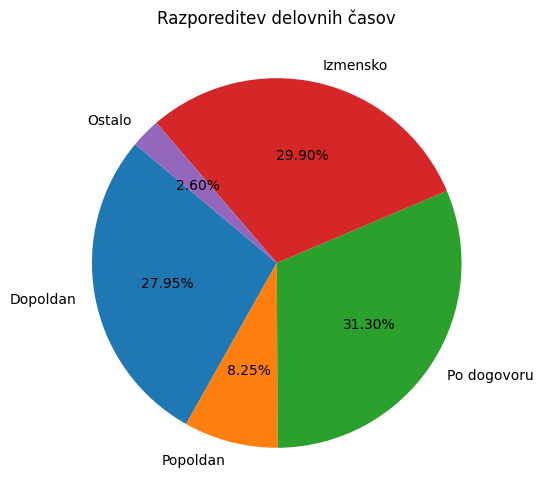

In [5]:
čas_dela = list(slovar.keys())
število_del = list(slovar.values())
plt.figure(figsize=(6, 6))
plt.pie(število_del, labels=čas_dela, autopct='%1.2f%%', startangle=140)
plt.title('Razporeditev delovnih časov')
plt.show()

# Dela v Ljubljani

In [6]:
dela_v_Lj = DELA[DELA['kraj'].str.contains(r'\bLJUBLJANA\b|\bLJUBLJANI\b', case=False, na=False)]
dela_v_Lj

,plača neto,kraj,delovnik,trajanje
delo,,,,
MARKETING,9.00 €/h neto,LJUBLJANA,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
ADMINISTRATIVNA DELA,7.31 €/h neto,LJUBLJANA,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
DELO V TURIZMU,8.00 €/h neto,LJUBLJANA,IZMENSKO,PO DOGOVORU
INŠTRUKCIJE,9.60 €/h neto,LJUBLJANA,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)
POMOČ PRI PRODAJI,7.00 €/h neto,LJUBLJANA,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
...,...,...,...,...
DELO V SKLADIŠČU,7.80 €/h neto,LJUBLJANA,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
BLAGAJNIK,6.88 €/h neto,LJUBLJANA,IZMENSKO,POČITNIŠKO DELO
ZDRAVSTVENA NEGA,8.00 €/h neto,LJUBLJANA,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)


Funkcija, ki vrne slovar, katerega vrednosti so števila možnih del glede na delovnik

In [7]:
def šteje_dela_po_delovniku(dela_v_Lj):
    preštevanje = {
        'Dopoldan': int(dela_v_Lj['delovnik'].str.contains('DOPOLDAN').sum()),
        'Popoldan': int(dela_v_Lj['delovnik'].str.contains('POPOLDAN').sum()),
        'Po dogovoru': int(dela_v_Lj['delovnik'].str.contains('PO DOGOVORU').sum()),
        'Izmensko': int(dela_v_Lj['delovnik'].str.contains('IZMENSKO').sum())
    }
    preštevanje['Ostalo'] = int(dela_v_Lj[~dela_v_Lj['delovnik'].str.contains('DOPOLDAN|POPOLDAN|PO DOGOVORU|IZMENSKO', case=False, na=False)].shape[0])
    return preštevanje

števila = šteje_dela_po_delovniku(dela_v_Lj)
števila

{'Dopoldan': 281,
 'Popoldan': 64,
 'Po dogovoru': 197,
 'Izmensko': 188,
 'Ostalo': 9}

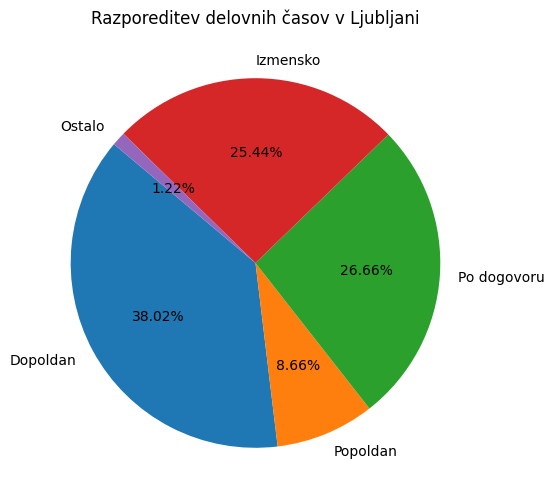

In [8]:
čas_dela = list(števila.keys())
število_del = list(števila.values())
plt.figure(figsize=(6, 6))
plt.pie(število_del, labels=čas_dela, autopct='%1.2f%%', startangle=140)
plt.title('Razporeditev delovnih časov v Ljubljani')
plt.show()

Ločimo dela v Ljubljani glede na velikost plače

In [24]:
plača_do_osem = dela_v_Lj[(dela_v_Lj['plača neto'] >= '6.20 €/h neto') & (dela_v_Lj['plača neto'] <= '7.99 €/h neto')].sort_values('plača neto', ascending= False)
plača_do_osem[['plača neto']]

,plača neto
delo,
ADMINISTRATIVNA DELA,7.94 €/h neto
ANIMATOR/KA,7.92 €/h neto
POMOČ V STREŽBI,7.85 €/h neto
DELO V KUHINJI,7.80 €/h neto
STREŽBA,7.80 €/h neto
...,...
PROJEKTNO DELO,6.20 €/h neto
MASER/KA,6.20 €/h neto
ADMINISTRATIVNA DELA,6.20 €/h neto


In [10]:
do_osem = plača_do_osem.groupby('plača neto').size()
do_osem

plača neto
6.20 €/h neto    75
6.24 €/h neto     3
6.30 €/h neto     1
6.37 €/h neto     1
6.41 €/h neto     1
                 ..
7.74 €/h neto    39
7.80 €/h neto     5
7.85 €/h neto     1
7.92 €/h neto     1
7.94 €/h neto     1
Length: 44, dtype: int64

<Axes: xlabel='plača neto'>

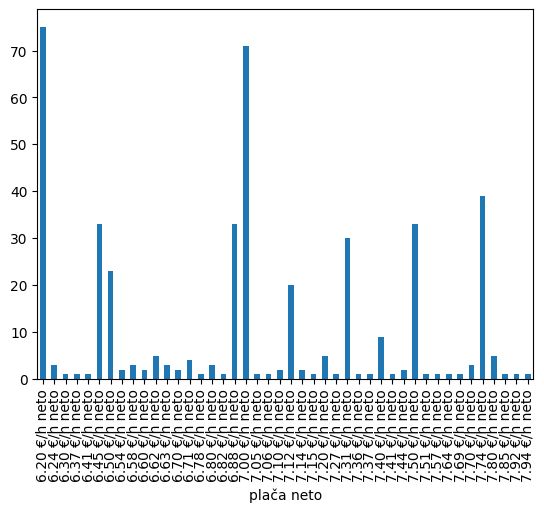

In [11]:
do_osem.plot.bar()

In [29]:
plača_od_osem_do_deset = dela_v_Lj[(dela_v_Lj['plača neto'] >= '8.00 €/h neto') & (dela_v_Lj['plača neto'] <= '9.99 €/h neto')].sort_values('plača neto', ascending=False)
plača_od_osem_do_deset[['plača neto']]

,plača neto
delo,
STROJNIŠKA DELA,9.90 €/h neto
PROGRAMIRANJE,9.90 €/h neto
INFORMATIKA,9.90 €/h neto
INŠTRUKCIJE,9.60 €/h neto
STREŽBA,9.50 €/h neto
...,...
STREŽBA,8.00 €/h neto
PRODAJA,8.00 €/h neto
PRODAJA,8.00 €/h neto


In [30]:
filter1 = plača_od_osem_do_deset.groupby('plača neto').size()
filter1

plača neto
8.00 €/h neto    81
8.05 €/h neto     2
8.09 €/h neto     1
8.15 €/h neto     5
8.17 €/h neto     7
                 ..
9.30 €/h neto     6
9.47 €/h neto     8
9.50 €/h neto     3
9.60 €/h neto     1
9.90 €/h neto     3
Length: 26, dtype: int64

<Axes: xlabel='plača neto'>

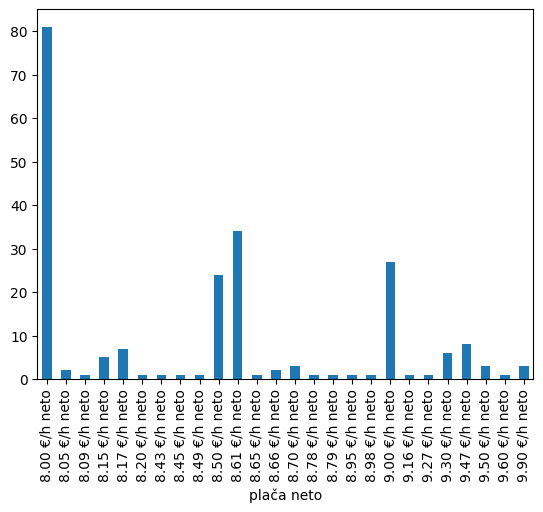

In [14]:
filter1.plot.bar()

In [34]:
#plača_nad_deset = dela_v_Lj[(dela_v_Lj['plača neto'] >= '10.00 €/h neto') & (dela_v_Lj['plača neto'] < '50.0 €/h neto')].sort_values('plača neto', ascending= False)
#plača_nad_deset[['plača neto']]

plača_nad_deset = dela_v_Lj[dela_v_Lj[~plača_do_osem]]

TypeError: bad operand type for unary ~: 'str'

In [16]:
filter2 = plača_nad_deset.groupby('plača neto').size()
filter2

plača neto
10.15 €/h neto    1
10.18 €/h neto    1
10.33 €/h neto    2
10.50 €/h neto    1
10.62 €/h neto    1
                 ..
13.77 €/h neto    4
14.00 €/h neto    1
15.00 €/h neto    7
15.27 €/h neto    3
20.00 €/h neto    2
Length: 19, dtype: int64

<Axes: xlabel='plača neto'>

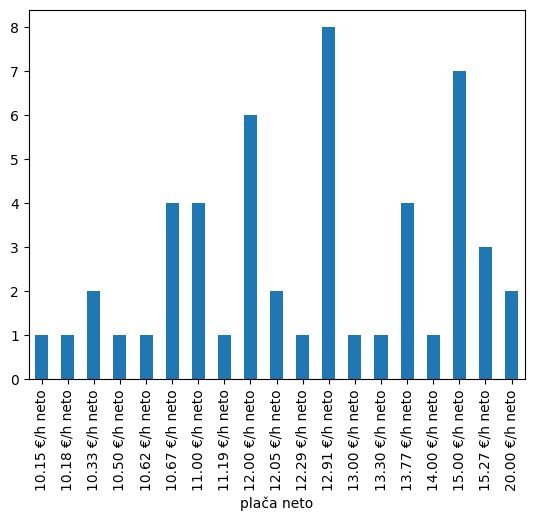

In [17]:
filter2.plot.bar()

# Dela izven Ljubljane

Tabela razvrsti dela od najbolj do najmanj plačanih

In [18]:
ne_v_Lj = podtabela[~podtabela['kraj'].str.contains(r'\bLJUBLJANA\b|\bLJUBLJANI\b', case= False)].reset_index()
ne_v_Lj

,delo,plača neto,kraj,delovnik,trajanje
0,POUČEVANJE,20.0 €/h neto,KAMNIK,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
1,VADITELJ/ICA,20.0 €/h neto,VELENJE,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
2,POUČEVANJE,16.52 €/h neto,BLED IN RADOVLJICA,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
3,TRENER/KA,15.0 €/h neto,GROSUPLJE,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
4,POUČEVANJE,15.0 €/h neto,IDRIJA,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
...,...,...,...,...,...
1185,DIGITALNI MARKETING,6.2 €/h neto,MARIBOR,PO DOGOVORU,PO DOGOVORU
1186,DELO V KUHINJI,6.2 €/h neto,SLOVENSKE KONJICE,DOPOLDAN,POČITNIŠKO DELO
1187,PRODAJA,6.2 €/h neto,MURSKA SOBOTA,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
1188,PRODAJA,6.2 €/h neto,CELJE,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)


Funkcija, ki prikaže število vseh del izven Ljubljane

In [19]:
def stevilo_pojavitev_del(ne_v_Lj):
    pojavitev = ne_v_Lj['delo'].value_counts()
    return pojavitev

stevilo_del = stevilo_pojavitev_del(ne_v_Lj)
stevilo_del

delo
STREŽBA                               210
POMOČ V STREŽBI                        86
STREŽBA HRANE IN PIJAČE                72
DELO V PROIZVODNJI                     62
BLAGAJNIK                              48
                                     ... 
MARKETING                               1
POMOČNIK VZGOJITELJA/VZGOJITELJICE      1
KNJIGOVODSKA DELA                       1
VARSTVO                                 1
ANKETIRANJE                             1
Name: count, Length: 113, dtype: int64

Oglejmo si trajanje in delovnik

In [20]:
ne_v_Lj = ne_v_Lj.reset_index()
trajanje_in_delovnik = ne_v_Lj[['delo', 'delovnik', 'trajanje']].copy()
trajanje_in_delovnik

,delo,delovnik,trajanje
0,POUČEVANJE,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
1,VADITELJ/ICA,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
2,POUČEVANJE,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
3,TRENER/KA,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
4,POUČEVANJE,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
...,...,...,...
1185,DIGITALNI MARKETING,PO DOGOVORU,PO DOGOVORU
1186,DELO V KUHINJI,DOPOLDAN,POČITNIŠKO DELO
1187,PRODAJA,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
1188,PRODAJA,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)


Histogram, ki prikazuje delovnik in število del, za določen delovni čas

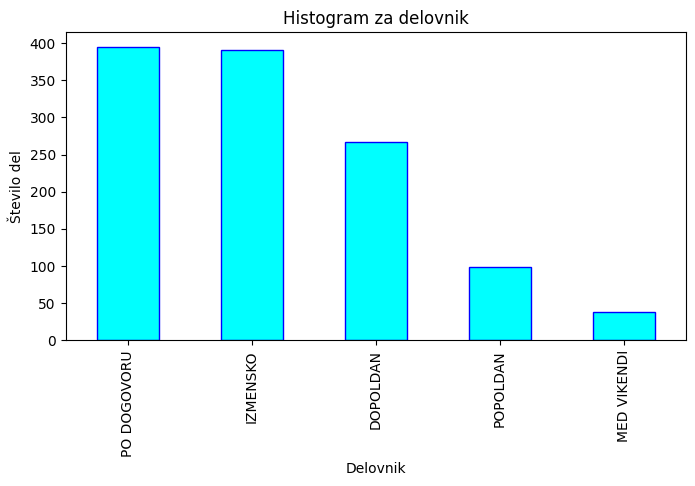

In [21]:
plt.figure(figsize=(8, 4))
trajanje_in_delovnik['delovnik'].value_counts().plot(kind='bar', color='cyan', edgecolor='blue')
plt.title('Histogram za delovnik')
plt.xlabel('Delovnik')
plt.ylabel('Število del')
plt.show()

Dela v strežbi izven Ljubljane in trajanje

In [22]:
strežba = trajanje_in_delovnik[trajanje_in_delovnik['delo'].str.contains(r'\bSTREŽBA\b|\bSTREŽBI\b', case=False)]
strežba[['delo', 'trajanje']]

,delo,trajanje
32,STREŽBA HRANE IN PIJAČE,PO DOGOVORU
33,STREŽBA,DO 30. 9. 2024
40,POMOČ V STREŽBI,DLJE ČASA (ZAČ. IN OBČ. DELO)
44,POMOČ V STREŽBI,DLJE ČASA (ZAČ. IN OBČ. DELO)
49,POMOČ V STREŽBI,DLJE ČASA (ZAČ. IN OBČ. DELO)
...,...,...
1154,POMOČ V STREŽBI,PO DOGOVORU
1165,STREŽBA,DLJE ČASA (ZAČ. IN OBČ. DELO)
1168,POMOČ V STREŽBI,POČITNIŠKO DELO
1174,STREŽBA HRANE IN PIJAČE,DLJE ČASA (ZAČ. IN OBČ. DELO)


Tabela, ki prikazuje dela v strežbi in njihovo trajanje

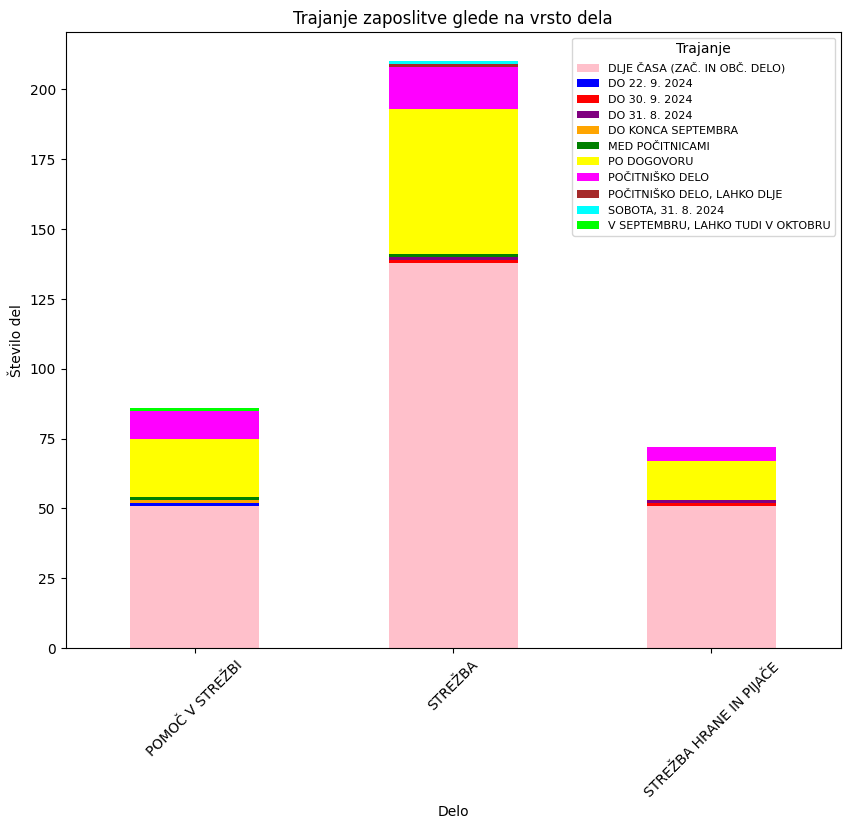

In [23]:
s = strežba.copy()
s['trajanje'] = s['trajanje'].apply(lambda x: 'PO DOGOVORU' if 'PO DOGOVORU' in x else x)
trajanje_dela = s.groupby(['trajanje', 'delo']).size().unstack().fillna(0)

barve = [
    'pink', 'blue', 'red', 'purple', 'orange', 'green', 'yellow', 'magenta',
    'brown', 'cyan', 'lime', 'black', 'gold', 'grey'
]

trajanje_dela.T.plot(kind='bar', stacked=True, figsize=(10, 8), color=barve)
plt.title('Trajanje zaposlitve glede na vrsto dela')
plt.xlabel('Delo')
plt.ylabel('Število del')
plt.xticks(rotation=45)
plt.legend(title='Trajanje', prop={'size': 8})
plt.show()